Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [1]:
from random import random, seed
from itertools import product,accumulate
import numpy as np

from icecream import ic

from matplotlib import pyplot as plt

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [2]:
UNIVERSE_SIZE = 100_000
NUM_SETS = 10000
DENSITY = 0.3

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

: 

In [12]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [13]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Have Fun!

In [14]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

(np.True_, np.float64(84097964.33387527))

In [15]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
valid(solution), cost(solution)

(np.True_, np.float64(41730524.40893959))

## Simulated Annealing

In [16]:
def tweak(solution: np.ndarray) -> np.ndarray: #single mutation 
    new_sol = solution.copy()
    i = rng.integers(0, NUM_SETS)
    new_sol[i] = not new_sol[i]
    return new_sol

def multiple_mutations(solution: np.ndarray) -> np.ndarray: #multiple mutations
    mask = rng.random(NUM_SETS) < 0.01
    new_sol = np.logical_xor(solution,mask)
    return new_sol

# strenght is an endogenous parameter
def multiple_mutations_strength(solution: np.ndarray,strength) -> np.ndarray: #multiple mutations
    mask = rng.random(NUM_SETS) < strength
    if not np.any(mask):
        mask[np.random.randint(NUM_SETS)] = True
    new_sol = np.logical_xor(solution,mask)
    return new_sol

In [17]:
# We need to also consider if the solution is valid
def fitness(solution: np.ndarray):
    return (valid(solution),-cost(solution))

# This uses the lexicografic order

ic| fitness(solution): (np.True_, np.float64(-84097964.33387527))


ic| fitness(solution): (np.True_, np.float64(-2190407.6026576813))
ic| history.index(float(solution_fitness[1])): 3023



 total steps: 0


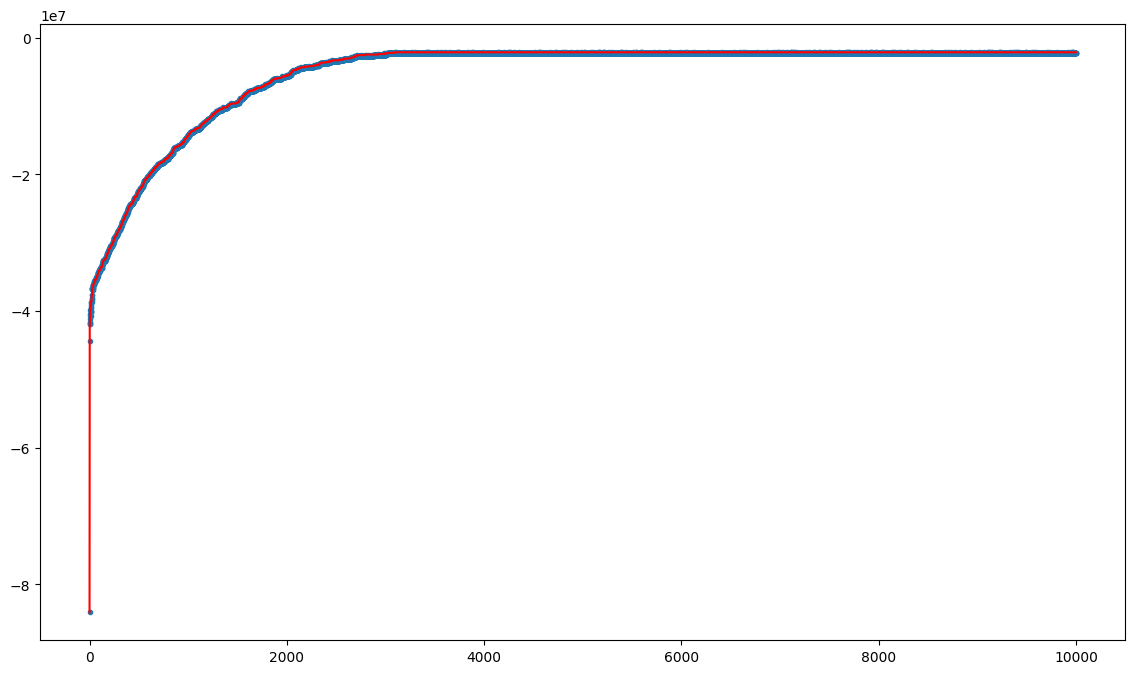

In [18]:
BUFFER_SIZE = 15

solution = rng.random(NUM_SETS) < 1 

solution_fitness = fitness(solution)
history = [float( solution_fitness[1] )]

ic(fitness(solution))

strength = 0.5
buffer = list()
for steps in range(10_000): 
    new_solution = multiple_mutations_strength(solution,strength)
    
    f = fitness(new_solution)

    history.append(float(f[1]))
    buffer.append(f > solution_fitness)
    buffer = buffer[-BUFFER_SIZE:]

    if sum(buffer) > BUFFER_SIZE / 2:
        strength *= 1.2

    if sum(buffer) < BUFFER_SIZE / 2:
        strength /= 1.2
    
    if f > solution_fitness:
        solution = new_solution
        solution_fitness = fitness(solution)

   
ic(fitness(solution))
ic(history.index(float(solution_fitness[1]))) # number of steps to reach the best solution


plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")